In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

import os

#os.listdir('topic_data')
#os.listdir('topic_data/t1')

In [10]:
def build_word_dict(t, d, count, word_value, visited_words):
        f = open('topic_data/' + d + '/' + t, 'r')
        x = f.readlines()
        f.close()

        for entry in x:
            #print (entry.split())
            for word in entry.split():
                
                if word not in visited_words:
                    word_value[word] = count[0]
                    visited_words.add(word)
                    count[0] += 1 

def pre_process():
    
    topic_directories = os.listdir('topic_data')
    
    visited_words = set()
    word_value = {}
    count = [4]

    
    for d in topic_directories:
        #print (d)
        if d != '.DS_Store':
            for t in os.listdir('topic_data/' + d):
                if t != '.DS_Store':
                    build_word_dict(t, d, count, word_value, visited_words)
                    
                    
    return word_value



d = pre_process()   
print (d)



{'The': 4, 'one-child': 5, 'policy': 6, '()': 7, 'is': 8, 'the': 9, 'limitation': 10, 'in': 11, 'population': 12, 'control': 13, 'of': 14, "People's": 15, 'Republic': 16, 'China': 17, '(PRC).': 18, 'Chinese': 19, 'government': 20, 'refers': 21, 'to': 22, 'it': 23, 'under': 24, 'official': 25, 'translation': 26, 'family': 27, 'planning': 28, '[REF].': 29, 'It': 30, 'officially': 31, 'restricts': 32, 'married,': 33, 'urban': 34, 'couples': 35, 'having': 36, 'only': 37, 'one': 38, 'child,': 39, 'while': 40, 'allowing': 41, 'exemptions': 42, 'for': 43, 'several': 44, 'cases,': 45, 'including': 46, 'rural': 47, 'couples,': 48, 'ethnic': 49, 'minorities,': 50, 'and': 51, 'parents': 52, 'without': 53, 'any': 54, 'siblings': 55, 'themselves': 56, 'A': 57, 'spokesperson': 58, 'Committee': 59, 'on': 60, 'One-Child': 61, 'Policy': 62, 'has': 63, 'said': 64, 'that': 65, 'approximately': 66, '35.9%': 67, "China's": 68, 'currently': 69, 'subject': 70, 'restriction': 71, 'Special': 72, 'Administrativ

In [9]:
def build_word_dict(t, d, count, word_value, visited_words, word_count):
        f = open('topic_data/' + d + '/' + t, 'r')
        x = f.readlines()
        f.close()

        for entry in x:
            #print (entry.split())
            for word in entry.split():
                
                if word not in word_count:
                    word_count[word] = 1
                else:
                    word_count[word] += 1
                
                if word not in visited_words:
                    word_value[word] = count[0]
                    visited_words.add(word)
                    count[0] += 1 

def pre_process():
    
    topic_directories = os.listdir('topic_data')
    
    visited_words = set()
    word_value = {}
    count = [4]
    
    word_count = {}

    
    for d in topic_directories:
        #print (d)
        if d != '.DS_Store':
            for t in os.listdir('topic_data/' + d):
                if t != '.DS_Store':
                    build_word_dict(t, d, count, word_value, visited_words, word_count)
                    
                    
    return word_count



d = pre_process()   
#print (d)

#remove the words with 2 or less count
def clean_word_count(word_count):
    clean_word_dict = {}
    for k in word_count.keys():
        if word_count[k] > 2:
            clean_word_dict[k] = word_count[k]
    
    return clean_word_dict

cl = clean_word_count(d)
print(cl)

{'The': 1292, 'one-child': 68, 'policy': 116, '()': 6, 'is': 1385, 'the': 9114, 'in': 3688, 'population': 426, 'control': 120, 'of': 5929, "People's": 35, 'Republic': 44, 'China': 202, 'Chinese': 201, 'government': 135, 'refers': 14, 'to': 4159, 'it': 440, 'under': 113, 'official': 28, 'family': 167, 'planning': 81, '[REF].': 1840, 'It': 201, 'officially': 18, 'urban': 89, 'couples': 32, 'having': 55, 'only': 225, 'one': 249, 'child,': 15, 'while': 147, 'allowing': 23, 'for': 1424, 'several': 88, 'cases,': 13, 'including': 149, 'rural': 60, 'ethnic': 30, 'minorities,': 5, 'and': 4928, 'parents': 89, 'without': 64, 'any': 99, 'siblings': 13, 'themselves': 35, 'A': 210, 'Committee': 5, 'on': 970, 'Policy': 3, 'has': 590, 'said': 58, 'that': 1791, 'approximately': 21, "China's": 57, 'currently': 17, 'subject': 34, 'restriction': 7, 'Special': 4, 'Hong': 64, 'Kong': 41, 'Macau': 8, 'are': 957, 'completely': 5, 'exempt': 5, 'from': 664, 'policy.': 12, 'Also': 16, 'this': 366, 'law': 79, 'li

In [11]:
def build_word_dict(t, d, count, word_value, visited_words, word_count):
        f = open('topic_data/' + d + '/' + t, 'r')
        x = f.readlines()
        f.close()

        for entry in x:
            for word in entry.split():
                
                if word not in visited_words and word in word_count:
                    word_value[word] = count[0]
                    visited_words.add(word)
                    count[0] += 1 

def pre_process(word_count):
    
    topic_directories = os.listdir('topic_data')
    
    visited_words = set()
    word_value = {}
    count = [4]
    
    
    
    for d in topic_directories:
        if d != '.DS_Store':
            for t in os.listdir('topic_data/' + d):
                if t != '.DS_Store':
                    build_word_dict(t, d, count, word_value, visited_words, word_count)
                    
                    
    return word_value



final_word_count = pre_process(cl)   
print (final_word_count)

{'The': 4, 'one-child': 5, 'policy': 6, '()': 7, 'is': 8, 'the': 9, 'in': 10, 'population': 11, 'control': 12, 'of': 13, "People's": 14, 'Republic': 15, 'China': 16, 'Chinese': 17, 'government': 18, 'refers': 19, 'to': 20, 'it': 21, 'under': 22, 'official': 23, 'family': 24, 'planning': 25, '[REF].': 26, 'It': 27, 'officially': 28, 'urban': 29, 'couples': 30, 'having': 31, 'only': 32, 'one': 33, 'child,': 34, 'while': 35, 'allowing': 36, 'for': 37, 'several': 38, 'cases,': 39, 'including': 40, 'rural': 41, 'ethnic': 42, 'minorities,': 43, 'and': 44, 'parents': 45, 'without': 46, 'any': 47, 'siblings': 48, 'themselves': 49, 'A': 50, 'Committee': 51, 'on': 52, 'Policy': 53, 'has': 54, 'said': 55, 'that': 56, 'approximately': 57, "China's": 58, 'currently': 59, 'subject': 60, 'restriction': 61, 'Special': 62, 'Hong': 63, 'Kong': 64, 'Macau': 65, 'are': 66, 'completely': 67, 'exempt': 68, 'from': 69, 'policy.': 70, 'Also': 71, 'this': 72, 'law': 73, 'living': 74, 'China.': 75, 'This': 76, 

In [16]:
#Make train data

word_value = pre_process(cl)   
train_data = []
train_label = []

PAD = 0

#print (word_value)

def get_all_train_data(train_data, word_value, train_label):
    
    topic_directories = os.listdir('topic_data')
    
    visited_words = set()
    #word_value = {}
    count = [4]
    label_count = 0
    
    for d in topic_directories:
        #print (d)
        if d != '.DS_Store':
            for t in os.listdir('topic_data/' + d):
                if t != '.DS_Store':
                    #print (d, t)
                    f = open('topic_data/' + d + '/' + t, 'r')
                    x = f.readlines()
                    f.close()
                    for entry in x:
                        temp_sentence = []
                        for word in entry.split():
                            if word in word_value:
                                temp_sentence.append(word_value[word])
                            else:
                                temp_sentence.append(3)

                        if len(temp_sentence) != 0:
                            train_label.append(label_count)
                            train_data.append(temp_sentence)
            label_count += 1
                            
                    
                    
    return train_data, train_label


'''
for entry in x:
    temp_sentence = []
    for word in entry.split():
        if word in word_value:
            temp_sentence.append(word_value[word])
        else:
            temp_sentence.append('?')
            
    train_data.append(temp_sentence)

'''

get_all_train_data(train_data, word_value, train_label)
print (train_data[300])
print (max(train_label))

#deconde train entry
'''
a = train_data[150]
for num in a:
    for k in word_value.keys():
        if word_value[k] == num:
            print (k)
'''

max_len = -1
for entry in train_data:
    max_len = max(max_len, len(entry))

print (max_len)
#Add the paddings to each entry
for i, entry in enumerate(train_data):
    if len(entry) != max_len:
        pads_to_add = max_len - len(entry)
        for _ in range(pads_to_add):
            train_data[i].append(PAD)
            

#print (train_data[50])       
print (max_len)
#print (train_data[100])

[295, 2407, 3, 10, 9, 171, 3, 2268, 3, 26, 510, 9, 3164, 143, 13, 1747, 3, 187, 466, 54, 2370, 112, 807, 9, 3165, 1832, 13, 9, 3, 51, 13, 9, 3166, 3, 3, 3167, 283, 13, 2952, 18, 3, 66, 686, 44, 3, 423, 2840, 16, 54, 3168, 20, 3, 180, 69, 2350, 10, 9, 1386, 10, 523, 13, 122, 3169, 141, 99, 3, 9, 176, 834, 3170, 869, 20, 9, 3, 1860, 26, 4, 3087, 178, 1345, 169, 667, 20, 127, 2177, 1148, 13, 505, 1708, 10, 3, 3, 26]
1
507
507


In [17]:
print (len(train_data))
print (len(train_label))
for i in range(len(train_label)):
    if train_label[i] == 1:
        print (i)
        break
        
print (train_label[1416])

final_train_data = train_data[:1134] + train_data[1417:2617]
final_train_label = train_label[:1134] + train_label[1417:2617]

final_test_data = train_data[1134:1417] + train_data[2617:]
final_test_label = train_label[1134:1417] + train_label[2617:]

print (len(final_train_data), len(final_train_label))
print (len(final_test_data), len(final_test_label))



2917
2917
1417
0
2334 2334
583 583


In [18]:


#print (train_data)
train_data = keras.preprocessing.sequence.pad_sequences(final_train_data, value=PAD, padding='post', maxlen=507)
test_data = keras.preprocessing.sequence.pad_sequences(final_test_data, value=PAD, padding='post', maxlen=507)

In [19]:
len(train_data[50])

507

In [20]:
train_data[0]

array([ 4,  5,  6,  7,  8,  9,  5,  3, 10,  9, 11, 12,  6, 13,  9, 14, 15,
       13, 16,  3,  4, 17, 18, 19, 20, 21, 22,  9, 23,  3, 13, 24, 25,  6,
       26, 27, 28,  3,  3, 29, 30, 20, 31, 32, 33, 34, 35, 36,  3, 37, 38,
       39, 40, 41,  3, 42, 43, 44, 45, 46, 47, 48, 49, 26, 50,  3, 13,  9,
       51, 52,  9,  3, 53, 54, 55, 56, 57,  3, 13, 58, 11,  8, 59, 60, 20,
        9,  5, 61, 26,  4, 62,  3,  3, 13, 63, 64, 44, 65, 66, 67, 68, 69,
        9, 70, 71, 68, 69, 72, 73, 66,  3, 74, 10, 75,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [21]:
len(train_data), len(train_data[1])

(2334, 507)

In [22]:
#27095

#vocab_size = 27095
vocab_size = 30000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          480000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 480,289
Trainable params: 480,289
Non-trainable params: 0
_________________________________________________________________


In [23]:
print (len(train_data))

#Loss function and optimizer
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

#Need a validation set
x_val = train_data[:200] #350 was initial
partial_x_train = train_data[200:]

y_val = final_train_label[:200]
partial_y_train = final_train_label[200:]

#Train model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=500,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

2334
Train on 2134 samples, validate on 200 samples
Epoch 1/500
2134/2134 [==============================] - 0s 185us/step - loss: 0.7645 - acc: 0.4377 - val_loss: 0.4965 - val_acc: 1.0000
Epoch 2/500
2134/2134 [==============================] - 0s 48us/step - loss: 0.7331 - acc: 0.4377 - val_loss: 0.5607 - val_acc: 1.0000
Epoch 3/500
2134/2134 [==============================] - 0s 48us/step - loss: 0.7122 - acc: 0.4377 - val_loss: 0.6219 - val_acc: 0.9950
Epoch 4/500
2134/2134 [==============================] - 0s 51us/step - loss: 0.6981 - acc: 0.4396 - val_loss: 0.6773 - val_acc: 0.9450
Epoch 5/500
2134/2134 [==============================] - 0s 49us/step - loss: 0.6903 - acc: 0.5722 - val_loss: 0.7208 - val_acc: 0.0000e+00
Epoch 6/500
2134/2134 [==============================] - 0s 50us/step - loss: 0.6859 - acc: 0.5623 - val_loss: 0.7584 - val_acc: 0.0000e+00
Epoch 7/500
2134/2134 [==============================] - 0s 48us/step - loss: 0.6834 - acc: 0.5623 - val_loss: 0.7896 - val

2134/2134 [==============================] - 0s 65us/step - loss: 0.6358 - acc: 0.6804 - val_loss: 0.8807 - val_acc: 0.1050
Epoch 60/500
2134/2134 [==============================] - 0s 64us/step - loss: 0.6341 - acc: 0.7095 - val_loss: 0.8749 - val_acc: 0.1150
Epoch 61/500
2134/2134 [==============================] - 0s 63us/step - loss: 0.6327 - acc: 0.7235 - val_loss: 0.8536 - val_acc: 0.1700
Epoch 62/500
2134/2134 [==============================] - 0s 58us/step - loss: 0.6309 - acc: 0.7146 - val_loss: 0.8591 - val_acc: 0.1700
Epoch 63/500
2134/2134 [==============================] - 0s 50us/step - loss: 0.6293 - acc: 0.7160 - val_loss: 0.8801 - val_acc: 0.1350
Epoch 64/500
2134/2134 [==============================] - 0s 50us/step - loss: 0.6278 - acc: 0.7151 - val_loss: 0.8895 - val_acc: 0.1300
Epoch 65/500
2134/2134 [==============================] - 0s 58us/step - loss: 0.6263 - acc: 0.7146 - val_loss: 0.8828 - val_acc: 0.1650
Epoch 66/500
2134/2134 [==============================

Epoch 119/500
2134/2134 [==============================] - 0s 76us/step - loss: 0.5267 - acc: 0.7409 - val_loss: 0.9354 - val_acc: 0.3700
Epoch 120/500
2134/2134 [==============================] - 0s 74us/step - loss: 0.5249 - acc: 0.7446 - val_loss: 0.9475 - val_acc: 0.3600
Epoch 121/500
2134/2134 [==============================] - 0s 64us/step - loss: 0.5223 - acc: 0.7470 - val_loss: 0.9260 - val_acc: 0.3700
Epoch 122/500
2134/2134 [==============================] - 0s 65us/step - loss: 0.5196 - acc: 0.7451 - val_loss: 0.9014 - val_acc: 0.4000
Epoch 123/500
2134/2134 [==============================] - 0s 55us/step - loss: 0.5172 - acc: 0.7413 - val_loss: 0.8761 - val_acc: 0.4350
Epoch 124/500
2134/2134 [==============================] - 0s 50us/step - loss: 0.5149 - acc: 0.7427 - val_loss: 0.9132 - val_acc: 0.3950
Epoch 125/500
2134/2134 [==============================] - 0s 49us/step - loss: 0.5116 - acc: 0.7526 - val_loss: 0.9098 - val_acc: 0.3950
Epoch 126/500
2134/2134 [=========

2134/2134 [==============================] - 0s 73us/step - loss: 0.3320 - acc: 0.9025 - val_loss: 0.6790 - val_acc: 0.6500
Epoch 179/500
2134/2134 [==============================] - 0s 66us/step - loss: 0.3288 - acc: 0.9142 - val_loss: 0.6961 - val_acc: 0.6300
Epoch 180/500
2134/2134 [==============================] - 0s 48us/step - loss: 0.3258 - acc: 0.9166 - val_loss: 0.6534 - val_acc: 0.6850
Epoch 181/500
2134/2134 [==============================] - 0s 47us/step - loss: 0.3227 - acc: 0.9025 - val_loss: 0.6141 - val_acc: 0.7200
Epoch 182/500
2134/2134 [==============================] - 0s 45us/step - loss: 0.3202 - acc: 0.9016 - val_loss: 0.6611 - val_acc: 0.6650
Epoch 183/500
2134/2134 [==============================] - 0s 45us/step - loss: 0.3163 - acc: 0.9147 - val_loss: 0.6683 - val_acc: 0.6550
Epoch 184/500
2134/2134 [==============================] - 0s 57us/step - loss: 0.3135 - acc: 0.9213 - val_loss: 0.6690 - val_acc: 0.6550
Epoch 185/500
2134/2134 [=======================

2134/2134 [==============================] - 0s 48us/step - loss: 0.1988 - acc: 0.9494 - val_loss: 0.5401 - val_acc: 0.7650
Epoch 238/500
2134/2134 [==============================] - 0s 46us/step - loss: 0.1972 - acc: 0.9485 - val_loss: 0.5574 - val_acc: 0.7500
Epoch 239/500
2134/2134 [==============================] - 0s 44us/step - loss: 0.1959 - acc: 0.9522 - val_loss: 0.5627 - val_acc: 0.7450
Epoch 240/500
2134/2134 [==============================] - 0s 59us/step - loss: 0.1946 - acc: 0.9494 - val_loss: 0.5410 - val_acc: 0.7600
Epoch 241/500
2134/2134 [==============================] - 0s 69us/step - loss: 0.1929 - acc: 0.9531 - val_loss: 0.5881 - val_acc: 0.7150
Epoch 242/500
2134/2134 [==============================] - 0s 60us/step - loss: 0.1924 - acc: 0.9592 - val_loss: 0.5574 - val_acc: 0.7450
Epoch 243/500
2134/2134 [==============================] - 0s 60us/step - loss: 0.1915 - acc: 0.9442 - val_loss: 0.4926 - val_acc: 0.8050
Epoch 244/500
2134/2134 [=======================

2134/2134 [==============================] - 0s 50us/step - loss: 0.1370 - acc: 0.9677 - val_loss: 0.5044 - val_acc: 0.7800
Epoch 297/500
2134/2134 [==============================] - 0s 49us/step - loss: 0.1363 - acc: 0.9606 - val_loss: 0.4985 - val_acc: 0.7850
Epoch 298/500
2134/2134 [==============================] - 0s 47us/step - loss: 0.1354 - acc: 0.9639 - val_loss: 0.5295 - val_acc: 0.7650
Epoch 299/500
2134/2134 [==============================] - 0s 48us/step - loss: 0.1347 - acc: 0.9672 - val_loss: 0.5227 - val_acc: 0.7750
Epoch 300/500
2134/2134 [==============================] - 0s 47us/step - loss: 0.1340 - acc: 0.9672 - val_loss: 0.5354 - val_acc: 0.7600
Epoch 301/500
2134/2134 [==============================] - 0s 47us/step - loss: 0.1338 - acc: 0.9695 - val_loss: 0.5290 - val_acc: 0.7650
Epoch 302/500
2134/2134 [==============================] - 0s 46us/step - loss: 0.1325 - acc: 0.9672 - val_loss: 0.5131 - val_acc: 0.7800
Epoch 303/500
2134/2134 [=======================

2134/2134 [==============================] - 0s 48us/step - loss: 0.1025 - acc: 0.9756 - val_loss: 0.5335 - val_acc: 0.7750
Epoch 356/500
2134/2134 [==============================] - 0s 48us/step - loss: 0.1025 - acc: 0.9789 - val_loss: 0.5269 - val_acc: 0.7750
Epoch 357/500
2134/2134 [==============================] - 0s 46us/step - loss: 0.1023 - acc: 0.9714 - val_loss: 0.4551 - val_acc: 0.8050
Epoch 358/500
2134/2134 [==============================] - 0s 47us/step - loss: 0.1018 - acc: 0.9695 - val_loss: 0.5343 - val_acc: 0.7750
Epoch 359/500
2134/2134 [==============================] - 0s 48us/step - loss: 0.1011 - acc: 0.9794 - val_loss: 0.5591 - val_acc: 0.7450
Epoch 360/500
2134/2134 [==============================] - 0s 48us/step - loss: 0.1005 - acc: 0.9789 - val_loss: 0.4917 - val_acc: 0.7900
Epoch 361/500
2134/2134 [==============================] - 0s 47us/step - loss: 0.1013 - acc: 0.9681 - val_loss: 0.4812 - val_acc: 0.7950
Epoch 362/500
2134/2134 [=======================

2134/2134 [==============================] - 0s 64us/step - loss: 0.0810 - acc: 0.9803 - val_loss: 0.5377 - val_acc: 0.7750
Epoch 415/500
2134/2134 [==============================] - 0s 57us/step - loss: 0.0811 - acc: 0.9813 - val_loss: 0.5276 - val_acc: 0.7750
Epoch 416/500
2134/2134 [==============================] - 0s 57us/step - loss: 0.0813 - acc: 0.9784 - val_loss: 0.4843 - val_acc: 0.7950
Epoch 417/500
2134/2134 [==============================] - 0s 56us/step - loss: 0.0825 - acc: 0.9799 - val_loss: 0.5825 - val_acc: 0.7500
Epoch 418/500
2134/2134 [==============================] - 0s 55us/step - loss: 0.0799 - acc: 0.9813 - val_loss: 0.4700 - val_acc: 0.7950
Epoch 419/500
2134/2134 [==============================] - 0s 56us/step - loss: 0.0806 - acc: 0.9766 - val_loss: 0.5323 - val_acc: 0.7750
Epoch 420/500
2134/2134 [==============================] - 0s 53us/step - loss: 0.0797 - acc: 0.9822 - val_loss: 0.5993 - val_acc: 0.7450
Epoch 421/500
2134/2134 [=======================

2134/2134 [==============================] - 0s 53us/step - loss: 0.0667 - acc: 0.9850 - val_loss: 0.5740 - val_acc: 0.7650
Epoch 474/500
2134/2134 [==============================] - 0s 50us/step - loss: 0.0662 - acc: 0.9817 - val_loss: 0.4933 - val_acc: 0.7950
Epoch 475/500
2134/2134 [==============================] - 0s 52us/step - loss: 0.0668 - acc: 0.9808 - val_loss: 0.5173 - val_acc: 0.7900
Epoch 476/500
2134/2134 [==============================] - 0s 52us/step - loss: 0.0655 - acc: 0.9836 - val_loss: 0.6066 - val_acc: 0.7650
Epoch 477/500
2134/2134 [==============================] - 0s 49us/step - loss: 0.0662 - acc: 0.9864 - val_loss: 0.5269 - val_acc: 0.7800
Epoch 478/500
2134/2134 [==============================] - 0s 49us/step - loss: 0.0664 - acc: 0.9813 - val_loss: 0.4880 - val_acc: 0.7950
Epoch 479/500
2134/2134 [==============================] - 0s 48us/step - loss: 0.0657 - acc: 0.9822 - val_loss: 0.6103 - val_acc: 0.7650
Epoch 480/500
2134/2134 [=======================

In [24]:
results = model.evaluate(test_data, final_test_label)

print(results)

583/583 [==============================] - 0s 28us/step
[0.31787792217516775, 0.8833619210977701]


In [25]:
#print (history.history)

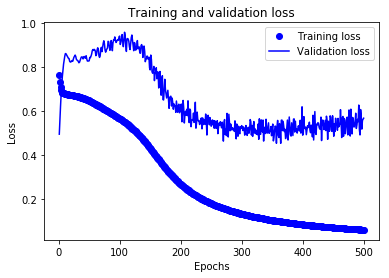

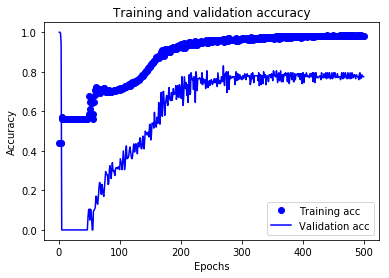

In [27]:
# Make use of matplot lib
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

#print (val_acc)

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()



plt.clf()   # clear figure
#acc_values = history_dict['acc']
#val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [22]:
#unk for rare words - throw out all words that occur once or twice
#using mask - learn how that can help the model
#experiment with different dropouts